In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data("/tmp/mnist.npz")

11493376/11490434 [==============================] - 108s 9us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [9]:
#print the first image to check
# X_train[0]

In [10]:
#Print the first output for the target variable
y_train[0]

5

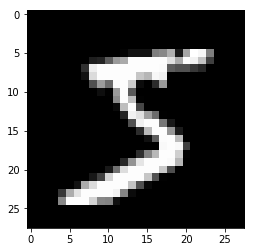

In [11]:
plt.imshow(X_train[0], cmap="gray")

In [14]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [15]:
#now its become a single list, instead of like before when it was a list of lists
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [16]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train/=255.0 #This is done for normalization since the value of each pixel can be from 0 to 255

In [17]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#input layer 784 inputs- each will take one pixel value at a time
#hidden layer 1 - 300 neurons (anything but softmax)
#output layer- 10 neurons (use softmax)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
#this is the one that helps us build our model layer by layer
model = Sequential()

In [ ]:
#fully connected= Dense

In [25]:
model.add(Dense(512, input_dim= 784, activation = "relu")) #where 512 is the neurons in our hidden later,
#784 is our input layer and we have specified our choice of activation function 

In [ ]:
#Now if you want to add another hidden layer
model.add(Dense(300, activation="relu")) #the input layers get automatically added from the second layer onwards!

In [ ]:
#in the final output layer your activation function MUST be softmax, it cant be RELU! 

In [27]:
model=Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu')) #we only need to specify inputs in first layer
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #it has to be softmax!
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.0097 - acc: 0.9981 - val_loss: 0.0436 - val_acc: 0.9923
Epoch 2/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0074 - acc: 0.9981 - val_loss: 0.0865 - val_acc: 0.9872
Epoch 3/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0065 - acc: 0.9987 - val_loss: 0.0456 - val_acc: 0.9926
Epoch 4/10
48000/48000 [==============================] - 3s 59us/step - loss: 0.0087 - acc: 0.9982 - val_loss: 0.0572 - val_acc: 0.9909
Epoch 5/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.0088 - acc: 0.9982 - val_loss: 0.0530 - val_acc: 0.9908
Epoch 6/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0498 - val_acc: 0.9928
Epoch 7/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.0083 - acc: 0.9987 - val_loss: 0.0641 - val_acc

Text(0.5,0,'Epochs')

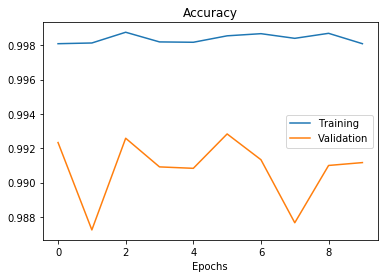

In [35]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [36]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 0s 44us/step


0.9795

In [37]:
#Implementing CNN

In [38]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [41]:
X_train.shape

(60000, 28, 28, 1)

In [42]:
from keras.layers import Flatten, Activation

In [47]:
from keras.layers import Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#32 are the no. of features i want, and my filter is (3,3) - this is a hyperparameter and can be 5,5 or 7,7

In [ ]:
#32 are the number of filters and the size of the filter is 3,3 
#number of filters = number of features 

In [ ]:
#convolution - then pooling - then apply activation on the output of the pooling after flattening

In [ ]:
#relu can be applied before or after pooling but after pooling is better because pooling shrinks the matrix
#a smaller matrix is computationally less expensive since matrix is smaller

In [ ]:
#cnn preserves spatial information!! which is why we use it
#no of parameters in cnn is less than dnn

In [48]:
# with 32 features its 32*9 weights (because filter is 3,3) 

In [ ]:
#784 features in the ANN 
#784+bias = 785 weights in ANN, whereas in CNN for the entire model its 32*9 features

In [ ]:
#so number of features in cnn is much less

In [ ]:
#each and every filter has its own bias so its 32 extra weights to be learnt
# so its 32*9 plus 32 for the bias terms of each of our 32 features

In [50]:
model.fit(X_train, y_train_cat, batch_size=128,
         epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 13s 311us/step - loss: 0.2681 - acc: 0.9178 - val_loss: 0.1449 - val_acc: 0.9554
Epoch 2/2
42000/42000 [==============================] - 12s 282us/step - loss: 0.0816 - acc: 0.9754 - val_loss: 0.0967 - val_acc: 0.9712


In [52]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 1s 127us/step


[1.0440224033683538, 0.9343]

In [ ]:
#the first item in the above list is our loss

In [ ]:
#CNN- weights are shared by pixels
#from keras.datasets import cifar10

In [ ]:
#CNN is used only when local spatial patterns need to be preserved- the order of rows and columns matter
#putting sepal length before sepal width doesnt matter but in image classification the positioning matters!

In [ ]:
#Adam optimizer

In [ ]:
#Data augmentation - when your classes are balanced but you want more data in order to train your model